In [223]:
import matplotlib.pyplot as plt 
import numpy as np 

In [224]:
def hypothesis(X_i, w, b):
    return np.dot(X_i, w) + b

In [225]:
def cost(X, y, w, b):
    m, n = X.shape
    err = 0

    for i in range(m):
        err += (hypothesis(X[i], w, b) - y[i]) ** 2
    
    cost = err / (2 * m)
    return cost


In [226]:
def calculateGradient(X, y, w, b):
    m, n = X.shape
    d_dw = np.zeros((n,))
    d_db = 0

    for i in range(m):
        err = hypothesis(X[i], w, b) - y[i]
        for j in range(n):
            d_dw[j] += err * X[i, j]
        d_db += err
    
    d_db /= m
    d_dw /= m 

    return d_dw, d_db

In [227]:
def gradientDescent(X, y, w, b, alpha, iterations=10000):
    m, n = X.shape 
    costArr = []
    iter = []

    for i in range(iterations):
        d_dw, d_db = calculateGradient(X, y, w, b)
        costArr.append(cost(X, y, w, b))
        iter.append(i)

        w = w - alpha * d_dw
        b = b - alpha * d_db

        if i % 1000 == 0:
            print(f"Iterations: {i}, Cost: {cost(X, y, w, b)}")

    return w, b, costArr, iter

In [228]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)


In [229]:
def normalizeScore(X):
    max = np.max(X, axis = 0)
    min = np.min(X, axis = 0)
    print((X - min))
    return (X - min) / (max - min)

Iterations: 0, Cost: 0.49710634631839307
Iterations: 1000, Cost: 0.004301421369420528
Iterations: 2000, Cost: 0.0004170103090660623
Iterations: 3000, Cost: 5.5005664121398126e-05
Iterations: 4000, Cost: 7.305453189130247e-06
Iterations: 5000, Cost: 9.703830353488698e-07
Iterations: 6000, Cost: 1.2889625164396265e-07
Iterations: 7000, Cost: 1.712132616263525e-08
Iterations: 8000, Cost: 2.274230678465431e-09
Iterations: 9000, Cost: 3.0208671511833577e-10
Iterations: 10000, Cost: 4.0126265250677534e-11
Iterations: 11000, Cost: 5.329983354797459e-12
Iterations: 12000, Cost: 7.07983222188516e-13
Iterations: 13000, Cost: 9.404161514561637e-14
Iterations: 14000, Cost: 1.2491574800438715e-14
Iterations: 15000, Cost: 1.659259490856622e-15
Iterations: 16000, Cost: 2.2039992099694102e-16
Iterations: 17000, Cost: 2.9275788472092135e-17
Iterations: 18000, Cost: 3.888711807212687e-18
Iterations: 19000, Cost: 5.165384189454322e-19
Iterations: 20000, Cost: 6.861195658309676e-20
Iterations: 21000, Cost

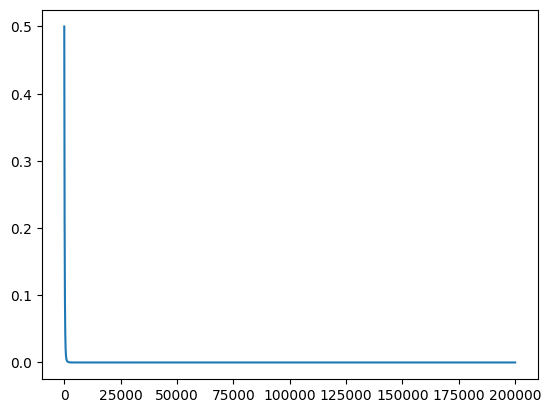

In [240]:
# TESTING OUR GRADIENT DESCENT 
w_initial = np.zeros((4,))
b_initial = 0
alpha = 0.0000008
iter = 20000000

X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

X_train = zscore_normalize_features(X_train)
# y_train = normalizeZScore(y_train)

w_final, b_final, costArr, iter = gradientDescent(X_train, y_train, w_initial, b_initial, alpha, iter)
plt.plot(np.array(iter), np.array(costArr))

print(f"w: {(w_final)}, b: {b_final}")


In [241]:
# PREDICTIONS 
def predict(x_input):
    print(f"Prediction: {hypothesis(x_input, w_final, b_final)}")

# size, # bedrooms, # floors, age of home
predict([2104, 5, 1, 45]) 
predict([1416, 3, 2, 40])

Prediction: 669.9185269810515
Prediction: 453.286000872185
